### Implement SVR on Admission Prediction data

#### dataset: https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv

##### importing the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

##### Read the dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


##### Basic info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


##### Checking null values

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

##### Checking duplicate values

In [6]:
len(df[df.duplicated()])

0

##### Checking distribution if features

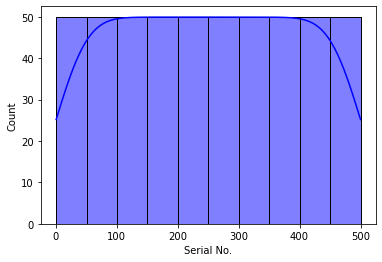

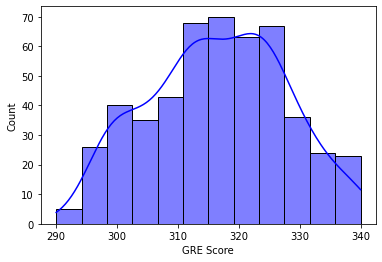

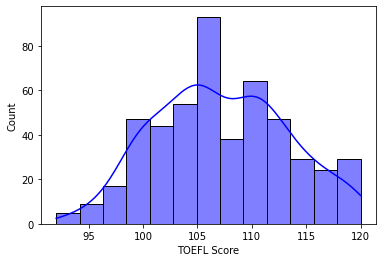

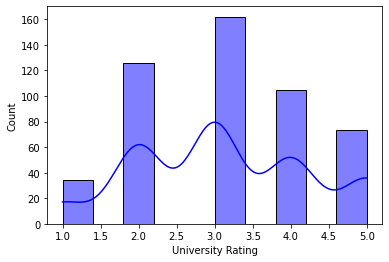

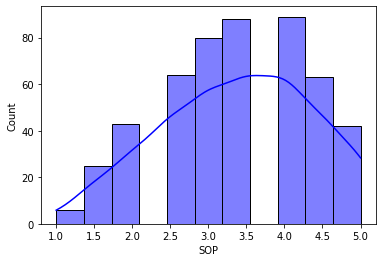

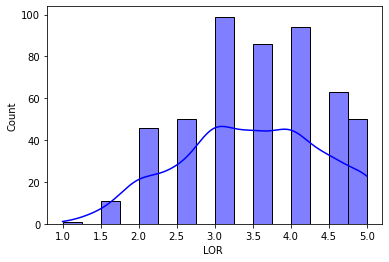

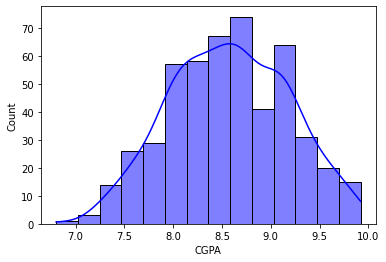

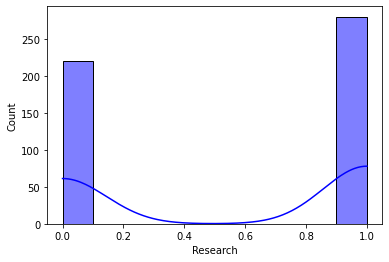

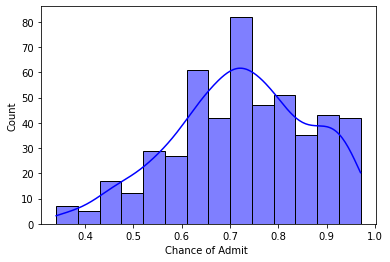

In [7]:
for features in df:
    sns.histplot(data=df[features],kde=True,color='b')
    plt.xlabel(features)
    plt.show()

##### Checking outliers

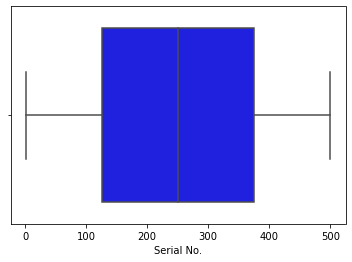

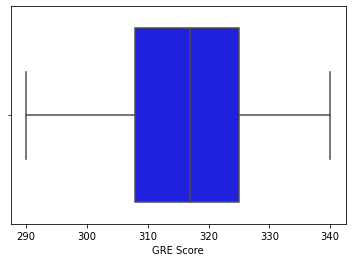

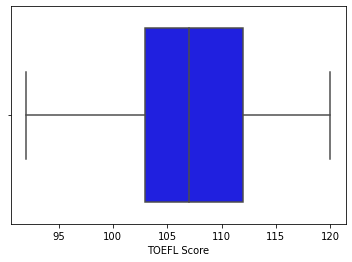

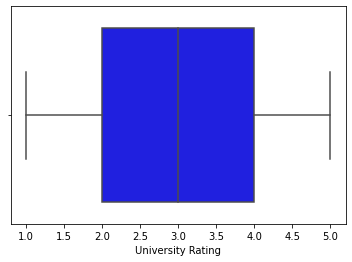

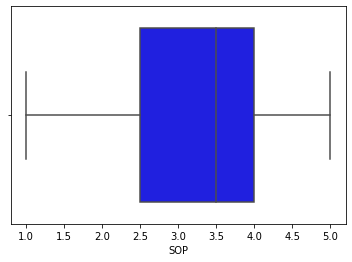

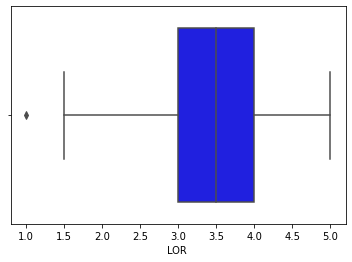

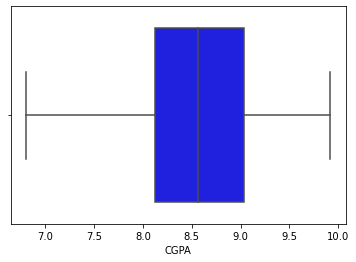

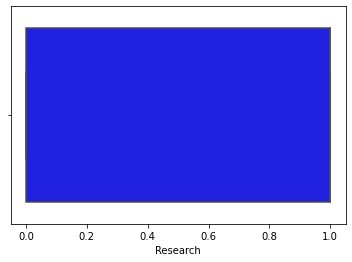

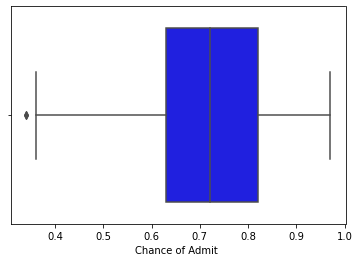

In [9]:
for features in df:
    sns.boxplot(x=features,data=df,color='b')
    plt.xlabel(features)
    plt.show()

##### There are hardly any outliers in the features

##### Checking correlation

In [10]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


##### Visualising the correlation through heatmap

<AxesSubplot:>

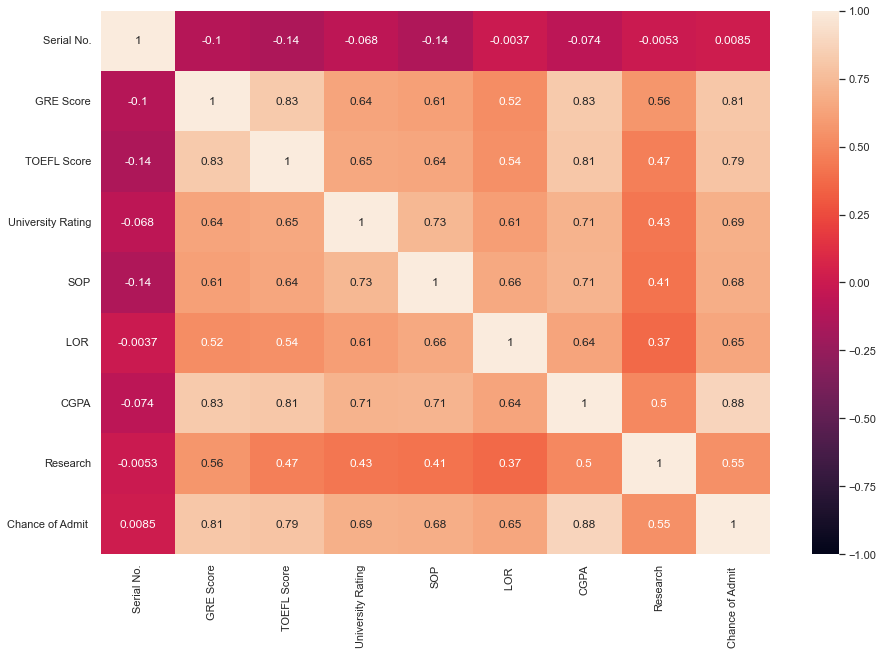

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

#### Model Building

In [14]:
df.columns=[features.replace(' ','') for features in df.columns]

In [15]:
df.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

In [16]:
X=df.drop(columns='ChanceofAdmit')
y=df['ChanceofAdmit']

In [17]:
X.head()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: ChanceofAdmit, Length: 500, dtype: float64

#### Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.72859016,  1.81923762,  1.77886545, ...,  1.09894429,
         1.77680627,  0.88640526],
       [-1.72166195,  0.66714832, -0.03160087, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-1.71473373, -0.0418297 , -0.52536441, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.71473373,  1.19888185,  2.10804114, ...,  1.63976333,
         1.62785086,  0.88640526],
       [ 1.72166195, -0.39631872, -0.68995225, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 1.72859016,  0.93301508,  0.95592621, ...,  1.09894429,
         0.76721964, -1.12815215]])

#### Splitting the train and test data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.33,random_state=89)

In [22]:
from sklearn.svm import SVR
svr=SVR()

In [23]:
svr.fit(X_train,y_train)

SVR()

In [26]:
y_pred=svr.predict(X_test)

In [27]:
y_pred

array([0.82317107, 0.79747769, 0.8186776 , 0.68873181, 0.58173659,
       0.76282128, 0.64308391, 0.75253197, 0.65023669, 0.6784028 ,
       0.89586393, 0.5481602 , 0.74522493, 0.86690499, 0.67296989,
       0.66866473, 0.65588382, 0.63613333, 0.48149063, 0.75756188,
       0.84841697, 0.75509763, 0.46827239, 0.61763981, 0.57418571,
       0.55974236, 0.83729825, 0.7800086 , 0.65167161, 0.75314184,
       0.52570683, 0.65075082, 0.67485489, 0.58192536, 0.72535537,
       0.59339454, 0.82799725, 0.65318401, 0.85483218, 0.80147133,
       0.67091698, 0.81170556, 0.61353896, 0.78108205, 0.74560733,
       0.52872553, 0.54759527, 0.87373862, 0.64769684, 0.90489139,
       0.64940061, 0.69244943, 0.62253565, 0.63006478, 0.81458139,
       0.62609896, 0.63793242, 0.74684743, 0.52050719, 0.80463079,
       0.6076137 , 0.62635943, 0.67248247, 0.69235555, 0.67045561,
       0.55062526, 0.46270333, 0.71134209, 0.76823839, 0.63269126,
       0.67538242, 0.63621559, 0.82356539, 0.74666796, 0.49437

##### Accuracy score

In [32]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
print('r2_score:',round(r2_score*100,3))

r2_score: 76.148


In [31]:
adj_r2=1-((1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_r2*100.00,3))

Adjusted R2 score is 74.925
